In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#한글깨짐 방지 -> 실행 후 런타임 재시작 필요요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,859 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
df = pd.read_csv('/content/mxmh_survey_results.csv')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


#데이터 탐색

---




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [5]:
df.isnull().sum() / len(df)

Timestamp                       0.000000
Age                             0.001359
Primary streaming service       0.001359
Hours per day                   0.000000
While working                   0.004076
Instrumentalist                 0.005435
Composer                        0.001359
Fav genre                       0.000000
Exploratory                     0.000000
Foreign languages               0.005435
BPM                             0.145380
Frequency [Classical]           0.000000
Frequency [Country]             0.000000
Frequency [EDM]                 0.000000
Frequency [Folk]                0.000000
Frequency [Gospel]              0.000000
Frequency [Hip hop]             0.000000
Frequency [Jazz]                0.000000
Frequency [K pop]               0.000000
Frequency [Latin]               0.000000
Frequency [Lofi]                0.000000
Frequency [Metal]               0.000000
Frequency [Pop]                 0.000000
Frequency [R&B]                 0.000000
Frequency [Rap] 

In [6]:
print(df['Music effects'].unique())
print(df['Music effects'].value_counts())

[nan 'No effect' 'Improve' 'Worsen']
Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64


In [7]:
print(df['Composer'].unique())
print(df['Composer'].value_counts())

['Yes' 'No' nan]
No     609
Yes    126
Name: Composer, dtype: int64


In [8]:
print(df['While working'].unique())
print(df['While working'].value_counts())

['Yes' 'No' nan]
Yes    579
No     154
Name: While working, dtype: int64


In [9]:
print(df['Instrumentalist'].unique())
print(df['Instrumentalist'].value_counts())

['Yes' 'No' nan]
No     497
Yes    235
Name: Instrumentalist, dtype: int64


In [10]:
print(df['Primary streaming service'].unique())
print(df['Primary streaming service'].value_counts())

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: Primary streaming service, dtype: int64


#데이터 전처리

---



In [11]:
#BPM 결측치 처리 : 평균 대치 (약 15% 비율로 결측치 존재)

mean = df['BPM'].mean()
df['BPM'] = df['BPM'].fillna(mean)

#범주형 변수 결측치 처리 : 삭제(모두 전체 데이터 셋의 6% 미만이기 때문)
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

- 수치형 변수인 BPM같은 경우 결측치가 전체 데이터 셋의 약 15%이기 때문에 삭제하면 데이터 손실이 꽤 커 삭제 보다는 평균 값 대치가 더 맞다고 판단

- 범주형 변수 같은 경우 1%, 4% 등 아주 적은 비율로 결측치가 존재하기 때문에 최빈값 대치 대신 삭제 진행

In [12]:
#timestamp 데이터 타입 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     718 non-null    datetime64[ns]
 1   Age                           718 non-null    float64       
 2   Primary streaming service     718 non-null    object        
 3   Hours per day                 718 non-null    float64       
 4   While working                 718 non-null    object        
 5   Instrumentalist               718 non-null    object        
 6   Composer                      718 non-null    object        
 7   Fav genre                     718 non-null    object        
 8   Exploratory                   718 non-null    object        
 9   Foreign languages             718 non-null    object        
 10  BPM                           718 non-null    float64       
 11  Frequency [Classical]         71

In [13]:
#파생변수 생성
#년, 월, 일, 요일, hour
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['hour'] = df['Timestamp'].dt.hour
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Depression,Insomnia,OCD,Music effects,Permissions,year,month,day,dayofweek,hour
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,7.0,10.0,2.0,No effect,I understand.,2022,8,27,5,21
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,7.0,3.0,3.0,Improve,I understand.,2022,8,27,5,21
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,2.0,5.0,9.0,Improve,I understand.,2022,8,27,5,21
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,8.0,7.0,7.0,Improve,I understand.,2022,8,27,5,21
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,8.0,6.0,0.0,Improve,I understand.,2022,8,27,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,6.0,0.0,9.0,Improve,I understand.,2022,10,30,6,14
732,2022-11-01 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,2.0,2.0,5.0,Improve,I understand.,2022,11,1,1,22
733,2022-11-03 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,2.0,2.0,2.0,Improve,I understand.,2022,11,3,3,23
734,2022-11-04 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,3.0,2.0,1.0,Improve,I understand.,2022,11,4,4,17


In [14]:
df['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4])

In [15]:
day_of_week = {
    0 : '월요일',
    1 : '화요일', 
    2 : '수요일',
    3 : '목요일',
    4 : '금요일',
    5 : '토요일',
    6 : '일요일'
}

df['dayofweek'] = [day_of_week[i] for i in df['dayofweek']]
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Depression,Insomnia,OCD,Music effects,Permissions,year,month,day,dayofweek,hour
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,7.0,10.0,2.0,No effect,I understand.,2022,8,27,토요일,21
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,7.0,3.0,3.0,Improve,I understand.,2022,8,27,토요일,21
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,2.0,5.0,9.0,Improve,I understand.,2022,8,27,토요일,21
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,8.0,7.0,7.0,Improve,I understand.,2022,8,27,토요일,21
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,8.0,6.0,0.0,Improve,I understand.,2022,8,27,토요일,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,6.0,0.0,9.0,Improve,I understand.,2022,10,30,일요일,14
732,2022-11-01 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,2.0,2.0,5.0,Improve,I understand.,2022,11,1,화요일,22
733,2022-11-03 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,2.0,2.0,2.0,Improve,I understand.,2022,11,3,목요일,23
734,2022-11-04 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,3.0,2.0,1.0,Improve,I understand.,2022,11,4,금요일,17


- 숫자를 요일로 변환

#데이터 시각화


---
1. 전체 연령을 기준으로 시각화 진행



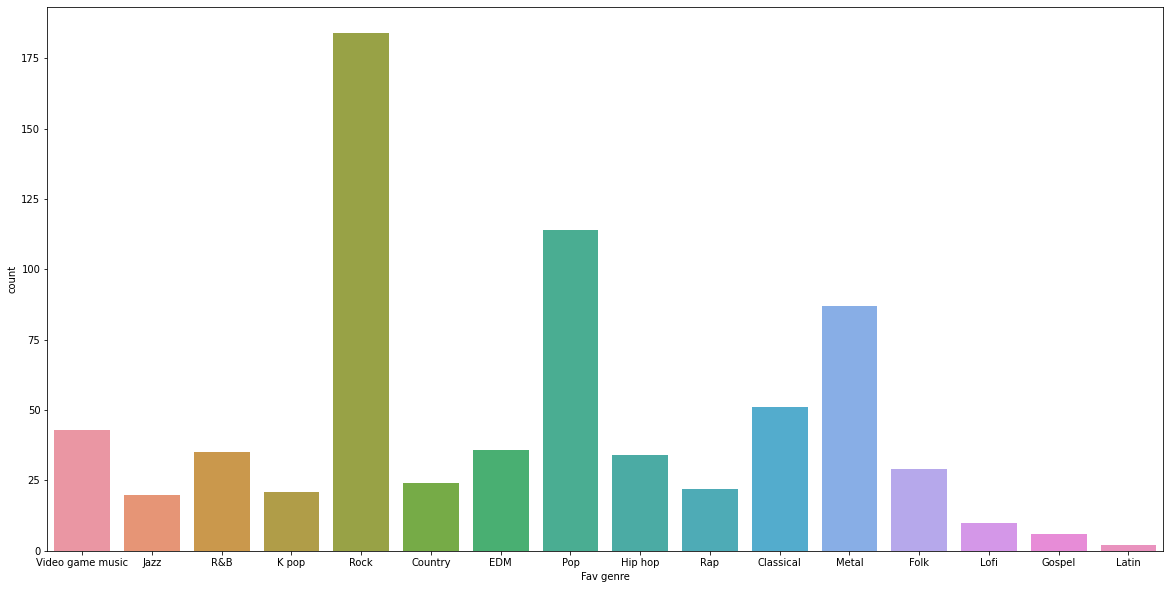

In [16]:
#선호하는 장르

plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Fav genre')

In [17]:
#직업 유무에 따른 music effects가 존재할까? (1번)

music_effect = df['Music effects'].unique().tolist()

for i in music_effect :
  df1 = pd.DataFrame(df[df['Music effects'] == i].groupby('While working')['While working'].count()).rename(columns={'While working' : 'count'})
  fig = px.bar(df1, x=df1.index, y='count', color=df1.index, text='count', title='%s'%i)
  fig.show()


Text(0.5, 1.0, '직업 유무에 따른 music effects')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50976 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47924 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50640 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46384 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47480 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

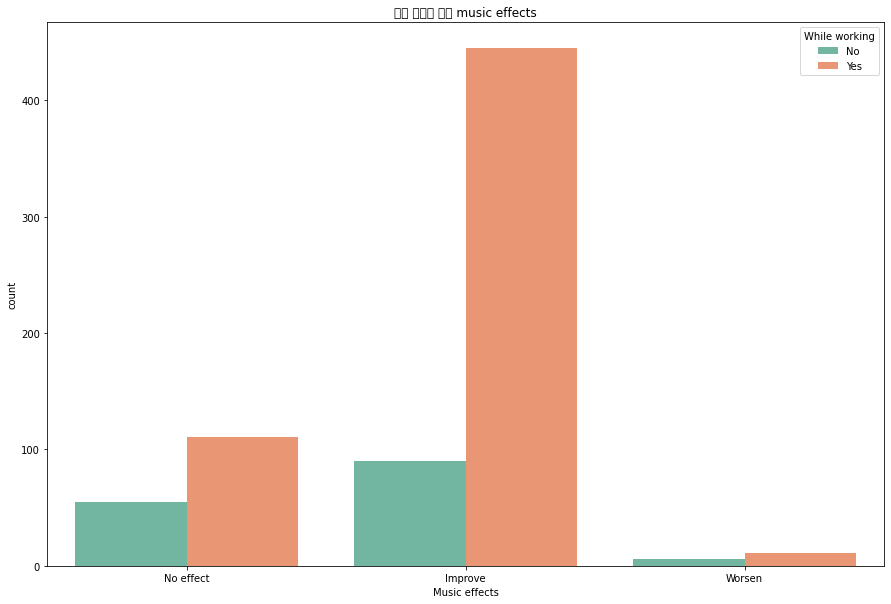

In [18]:
#직업 유무에 따른 music effects가 존재할까? (2번)
ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data=df, x='Music effects', hue='While working', palette='Set2')
ax.set_title("직업 유무에 따른 music effects")

직업이 있는 약 60%의 사람들은 음악이 영향을 준다고 응답

In [19]:
#어떤 음악 사이트를 자주 사용할까?
df_site = pd.DataFrame(df.groupby('Primary streaming service')['Primary streaming service'].count()).rename(columns={'Primary streaming service' : 'count'})
fig = px.pie(df_site, names=df_site.index, values='count', labels=df_site.index, title='유저들이 사용하는 음악 사이트 시각화')
fig.show()

spotify와 youtube music을 이용하는 유저가 전체의 약 80%를 차지

In [20]:
#월별 스트리밍 서비스 시각화 
df['month'] = df['month'].astype(str) + '월'

Text(0.5, 1.0, '월별 스트리밍 서비스 현황')

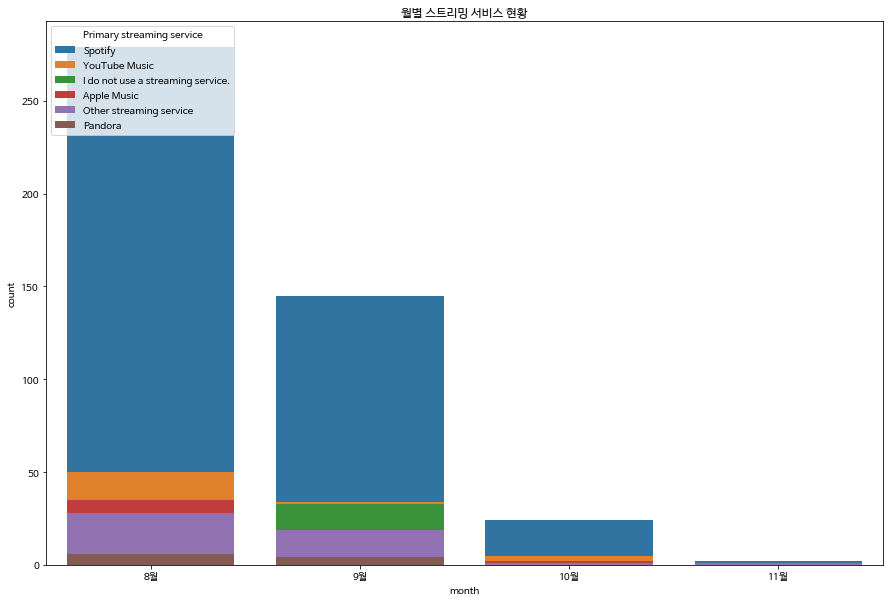

In [21]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(15,10))
a = sns.countplot(data=df, x='month', hue='Primary streaming service', dodge=False)
a.set_title('월별 스트리밍 서비스 현황')

In [22]:
#유저들의 하루 평균 음악을 듣는 시간은?
df['Hours per day'].unique()

array([ 4.  ,  2.5 ,  5.  ,  3.  ,  1.  ,  6.  ,  8.  ,  2.  , 12.  ,
       24.  ,  0.5 ,  0.25,  7.  , 10.  ,  1.5 ,  9.  ,  0.7 ,  4.5 ,
       20.  , 16.  , 15.  ,  0.  , 14.  ,  0.1 , 11.  , 18.  ])

In [23]:
df['hours_group'] = ""
df.loc[df['Hours per day']<1, 'hours_group'] = '1시간 미만'
df.loc[(df['Hours per day'] >=1) & (df['Hours per day'] <5), 'hours_group'] = '5시간 미만'
df.loc[(df['Hours per day'] >=5) & (df['Hours per day'] <10), 'hours_group'] = '10시간 미만'
df.loc[(df['Hours per day'] >=10) & (df['Hours per day'] <15), 'hours_group'] = '15시간 미만'
df.loc[(df['Hours per day'] >=15) & (df['Hours per day'] <20), 'hours_group'] = '20시간 미만'
df.loc[(df['Hours per day'] >=20) & (df['Hours per day'] <25), 'hours_group'] = '25시간 미만'
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Insomnia,OCD,Music effects,Permissions,year,month,day,dayofweek,hour,hours_group
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,10.0,2.0,No effect,I understand.,2022,8월,27,토요일,21,5시간 미만
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,3.0,3.0,Improve,I understand.,2022,8월,27,토요일,21,5시간 미만
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,5.0,9.0,Improve,I understand.,2022,8월,27,토요일,21,5시간 미만
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,7.0,7.0,Improve,I understand.,2022,8월,27,토요일,21,10시간 미만
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,6.0,0.0,Improve,I understand.,2022,8월,27,토요일,22,5시간 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,0.0,9.0,Improve,I understand.,2022,10월,30,일요일,14,5시간 미만
732,2022-11-01 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,2.0,5.0,Improve,I understand.,2022,11월,1,화요일,22,5시간 미만
733,2022-11-03 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,2.0,2.0,Improve,I understand.,2022,11월,3,목요일,23,10시간 미만
734,2022-11-04 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,2.0,1.0,Improve,I understand.,2022,11월,4,금요일,17,10시간 미만


Text(0.5, 1.0, '하루 평균 음악 감상 시간(hour)')

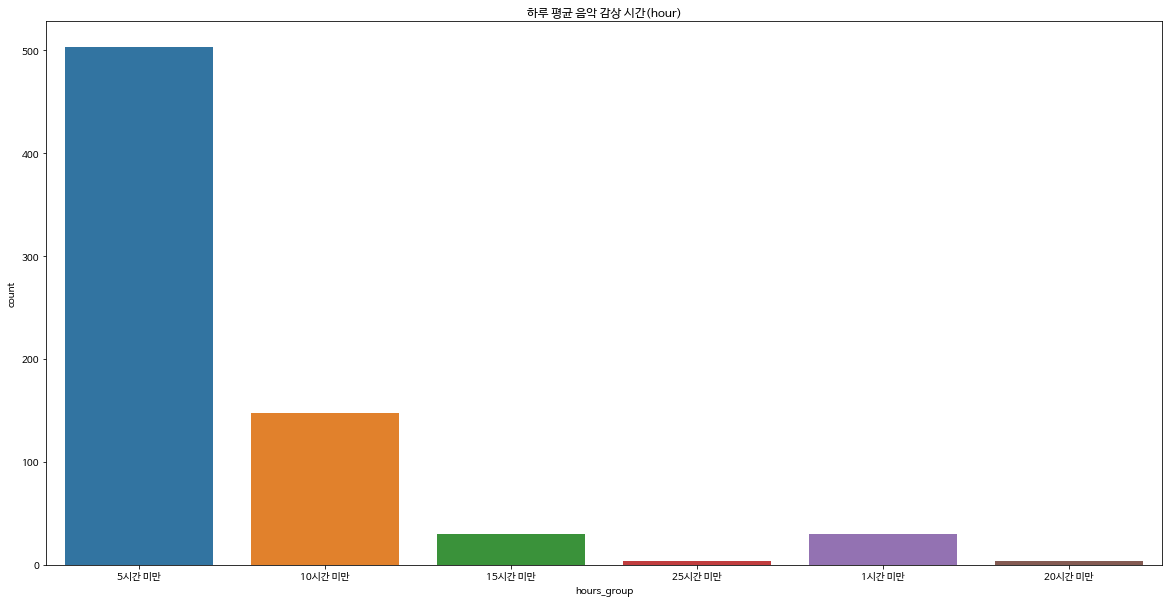

In [24]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20,10))
b = sns.countplot(data=df, x='hours_group')
b.set_title('하루 평균 음악 감상 시간(hour)')

음악을 하루 5시간 미만으로 듣는 유저 수가 전체 데이터의 약 80%임을 알 수 있음  

#데이터 시각화


---
2. 연령대별 시각화 진행


In [25]:
print(df['Age'].min(), df['Age'].max())

10.0 89.0


In [26]:
#연령대별 그룹화
df['연령대'] = ""
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), '연령대'] = '10대'
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), '연령대'] = '20대'
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), '연령대'] = '30대'
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), '연령대'] = '40대'
df.loc[(df['Age'] >= 50) & (df['Age'] < 60), '연령대'] = '50대'
df.loc[(df['Age'] >= 60) & (df['Age'] < 70), '연령대'] = '60대'
df.loc[(df['Age'] >= 70) & (df['Age'] < 80), '연령대'] = '70대'
df.loc[(df['Age'] >= 80) & (df['Age'] < 90), '연령대'] = '80대'

In [27]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,OCD,Music effects,Permissions,year,month,day,dayofweek,hour,hours_group,연령대
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,2.0,No effect,I understand.,2022,8월,27,토요일,21,5시간 미만,10대
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,3.0,Improve,I understand.,2022,8월,27,토요일,21,5시간 미만,60대
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,9.0,Improve,I understand.,2022,8월,27,토요일,21,5시간 미만,10대
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,7.0,Improve,I understand.,2022,8월,27,토요일,21,10시간 미만,10대
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,0.0,Improve,I understand.,2022,8월,27,토요일,22,5시간 미만,10대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,9.0,Improve,I understand.,2022,10월,30,일요일,14,5시간 미만,10대
732,2022-11-01 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,5.0,Improve,I understand.,2022,11월,1,화요일,22,5시간 미만,10대
733,2022-11-03 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,2.0,Improve,I understand.,2022,11월,3,목요일,23,10시간 미만,10대
734,2022-11-04 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,1.0,Improve,I understand.,2022,11월,4,금요일,17,10시간 미만,10대


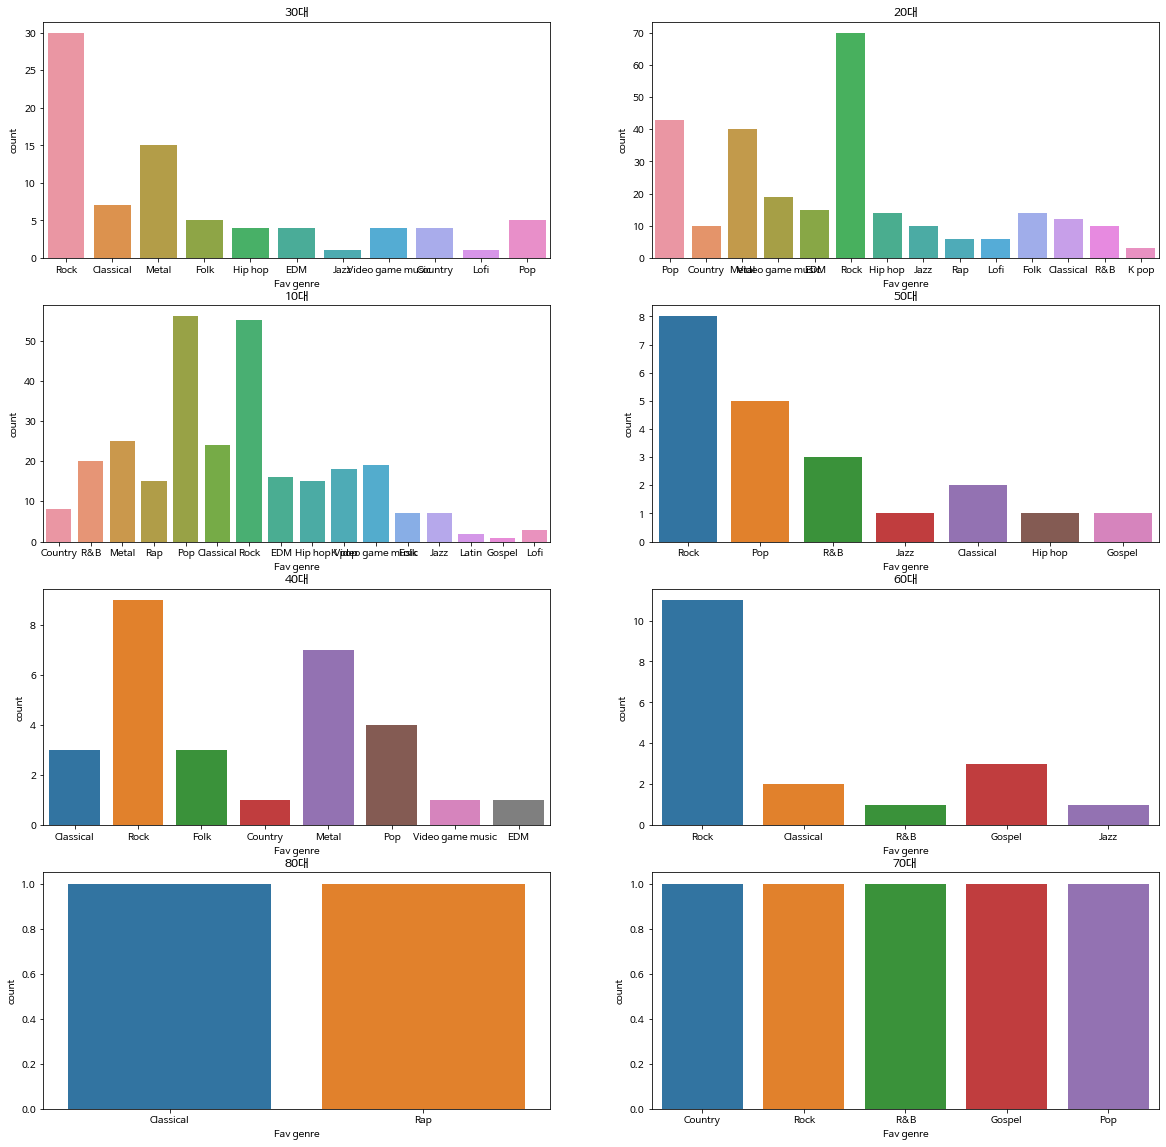

In [105]:
#연령대별 선호하는 장르
age_list = df['연령대'].unique().tolist()

fig, axis = plt.subplots(nrows=4 , ncols=2,  figsize=(20,20))

for i, name in enumerate(age_list) :
  a = sns.countplot(data=df.loc[df['연령대']==name], x='Fav genre', ax=axis[int(i/2), int(i%2)])
  a.set_title('%s'%name)



- 모든 연령대는 ROCK 장르의 노래를 즐기는 것을 볼 수 있음

In [29]:
df = df.sort_values(by='hour',ascending=True)
df['hour'] = df['hour'].astype(str) + '시'
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,OCD,Music effects,Permissions,year,month,day,dayofweek,hour,hours_group,연령대
260,2022-08-29 00:32:36,34.0,YouTube Music,1.0,No,No,No,Rock,No,Yes,...,4.0,Improve,I understand.,2022,8월,29,월요일,0시,5시간 미만,30대
266,2022-08-29 00:47:59,31.0,Spotify,8.0,Yes,Yes,No,Classical,Yes,Yes,...,4.0,Improve,I understand.,2022,8월,29,월요일,0시,10시간 미만,30대
265,2022-08-29 00:47:12,25.0,I do not use a streaming service.,1.0,No,No,No,Pop,No,Yes,...,9.0,No effect,I understand.,2022,8월,29,월요일,0시,5시간 미만,20대
264,2022-08-29 00:39:59,19.0,Spotify,2.0,Yes,No,No,Country,Yes,No,...,7.0,No effect,I understand.,2022,8월,29,월요일,0시,5시간 미만,10대
263,2022-08-29 00:39:19,20.0,Spotify,3.0,No,No,No,Country,Yes,Yes,...,4.0,Improve,I understand.,2022,8월,29,월요일,0시,5시간 미만,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2022-08-28 23:08:27,29.0,Spotify,5.0,Yes,Yes,Yes,Classical,Yes,Yes,...,0.0,Improve,I understand.,2022,8월,28,일요일,23시,10시간 미만,20대
17,2022-08-27 23:39:49,16.0,Spotify,12.0,Yes,No,Yes,Hip hop,Yes,Yes,...,0.0,Improve,I understand.,2022,8월,27,토요일,23시,15시간 미만,10대
16,2022-08-27 23:39:41,16.0,Spotify,8.0,Yes,No,No,Hip hop,Yes,Yes,...,3.0,Improve,I understand.,2022,8월,27,토요일,23시,10시간 미만,10대
686,2022-09-23 23:06:29,18.0,I do not use a streaming service.,1.0,Yes,No,No,Classical,No,No,...,5.0,No effect,I understand.,2022,9월,23,금요일,23시,5시간 미만,10대


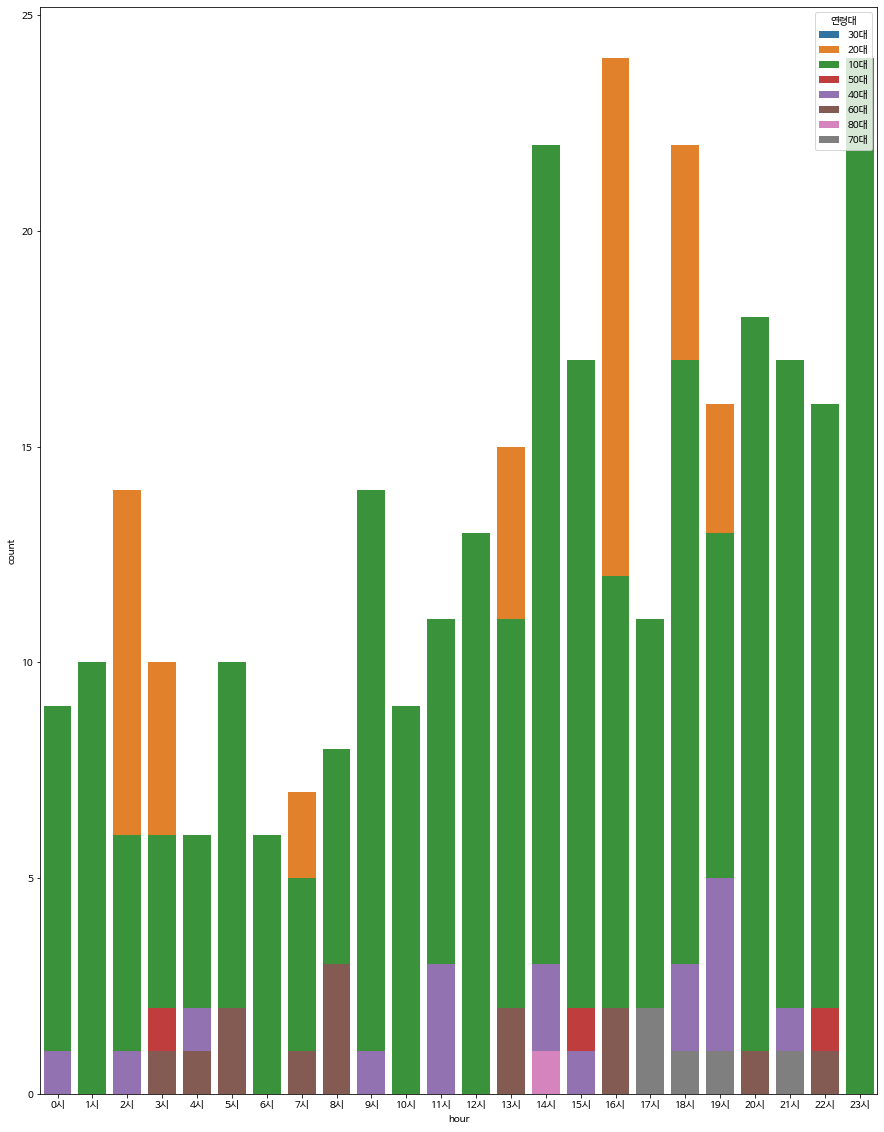

In [30]:
#시간대별 연령대별 비율 시각화
plt.figure(figsize=(15,20))
sns.countplot(data=df, x='hour', hue='연령대', dodge=False)

- 매 시간대별 음악을 많이 듣는 연령대는 10대임

- 40대는 저녁 7시에 음악을 가장 많이 듣는 것을 알 수 있음 

- 20대는 오전 2시, 오후 4시에 음악을 가장 많이 들음

- 60대 같은 경우 새벽부터 아침 시간대에 노래를 많이 듣는 것을 파악할 수 있음

In [101]:
#연령대별 선호하는 스트리밍 서비스

#연령대별 스트리밍 서비스 비율
age_list = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
pd1 = pd.DataFrame()
for i in age_list :
  age = df.loc[df['연령대'] == i]
  df_age = pd.DataFrame(age.groupby('Primary streaming service')['Primary streaming service'].count()).rename(columns={'Primary streaming service' : 'count'})
  df_age[i] = df_age['count'] / len(age)
  pd1 = pd.concat([pd1, df_age[i]], axis=1)

In [102]:
pd1

,10대,20대,30대,40대,50대,60대,70대,80대
Apple Music,0.075601,0.069853,0.0500,0.068966,0.047619,0.111111,NaN,NaN
I do not use a streaming service.,0.051546,0.106618,0.1125,0.172414,0.285714,0.055556,0.6,0.5
Other streaming service,0.058419,0.047794,0.0625,0.206897,0.238095,0.166667,NaN,NaN
Pandora,0.003436,0.003676,0.0250,NaN,0.047619,0.222222,0.2,NaN
Spotify,0.714777,0.643382,0.6125,0.379310,0.095238,0.166667,0.2,0.5
YouTube Music,0.096220,0.128676,0.1375,0.172414,0.285714,0.277778,NaN,NaN


In [103]:
#결측값 0으로 대치
pd1 = pd1.fillna(0)
pd1

,10대,20대,30대,40대,50대,60대,70대,80대
Apple Music,0.075601,0.069853,0.0500,0.068966,0.047619,0.111111,0.0,0.0
I do not use a streaming service.,0.051546,0.106618,0.1125,0.172414,0.285714,0.055556,0.6,0.5
Other streaming service,0.058419,0.047794,0.0625,0.206897,0.238095,0.166667,0.0,0.0
Pandora,0.003436,0.003676,0.0250,0.000000,0.047619,0.222222,0.2,0.0
Spotify,0.714777,0.643382,0.6125,0.379310,0.095238,0.166667,0.2,0.5
YouTube Music,0.096220,0.128676,0.1375,0.172414,0.285714,0.277778,0.0,0.0


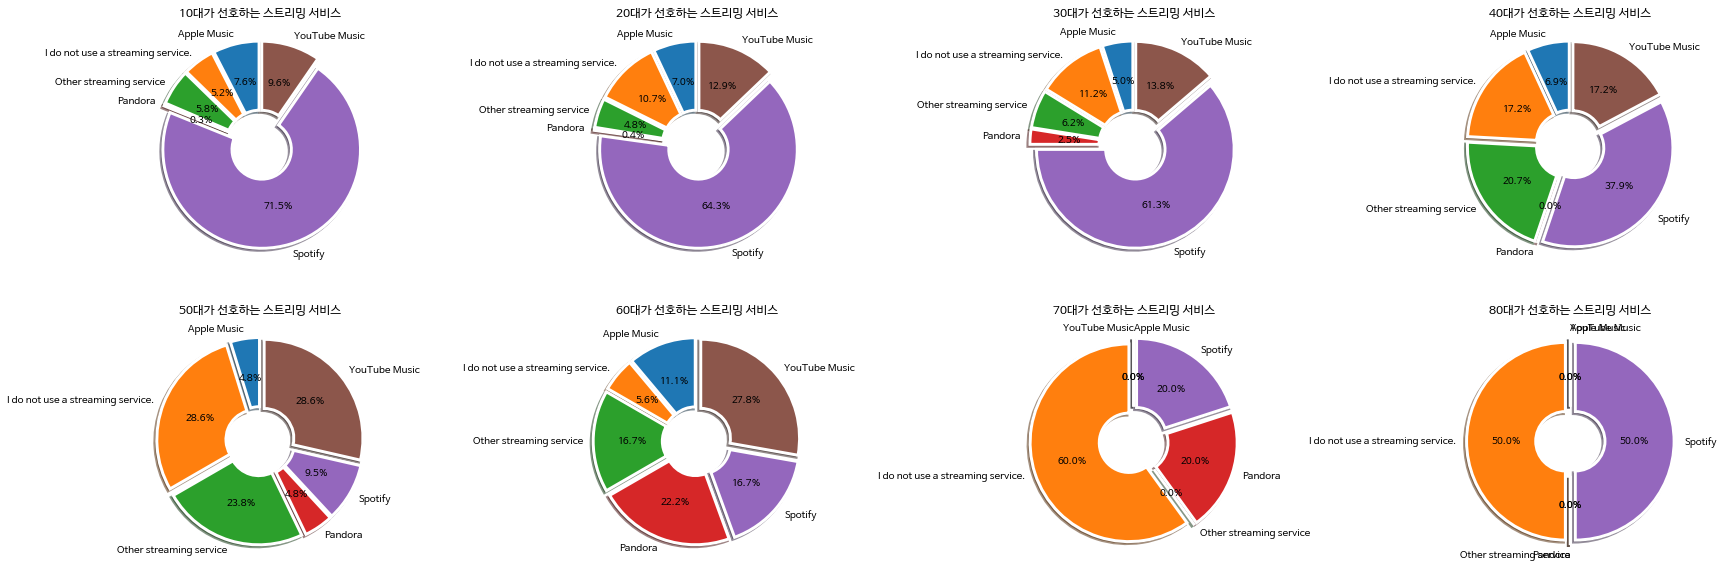

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30,10))

for i, name in enumerate(age_list) :
  ax[int(i/4), int(i%4)].pie(pd1[name], labels=pd1.index, autopct='%.1f%%', startangle=90, explode=[0.05,0.05,0.05,0.05,0.05,0.05], shadow=True, wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3})
  ax[int(i/4), int(i%4)].set_title('%s가 선호하는 스트리밍 서비스'%name)


- 10대, 20대, 30대, 80대는 주로 spotify 스트리밍 서비스를 사용하는 비율이 압도적으로 높음

- 50대, 60대는 youtube music 스트리빙 서비스를 주로 사용

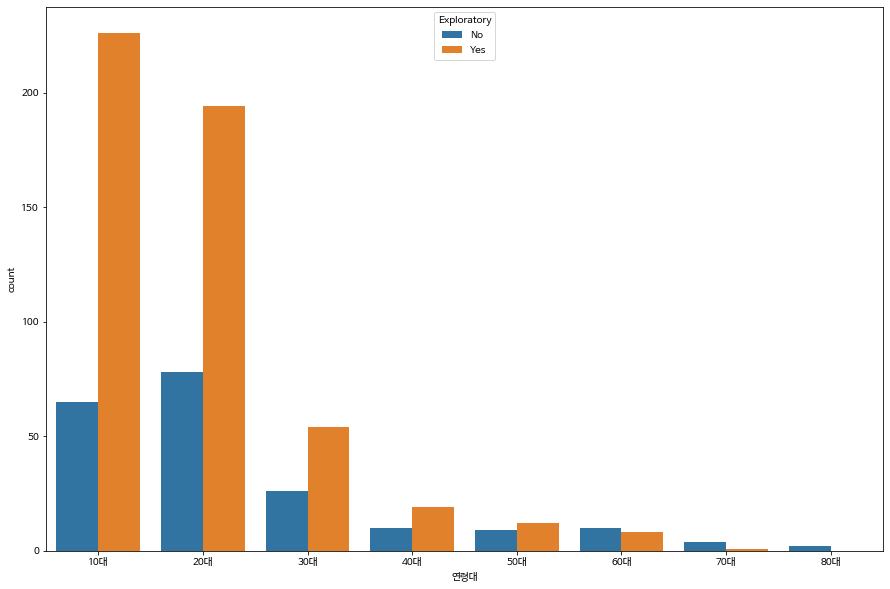

In [112]:
#연령대별 새로운 노래, 아티스트를 선호 정도 (Exploratory)

plt.figure(figsize=(15,10))
df1 = df.sort_values(by='연령대')
sns.countplot(data=df, x='연령대', hue='Exploratory', order = df['연령대'].value_counts().index)


- 10대, 20대, 30대와 같이 젊은 층의 연령군집은 새로운 노래, 새로운 아티스트를 긍정적으로 받아들임

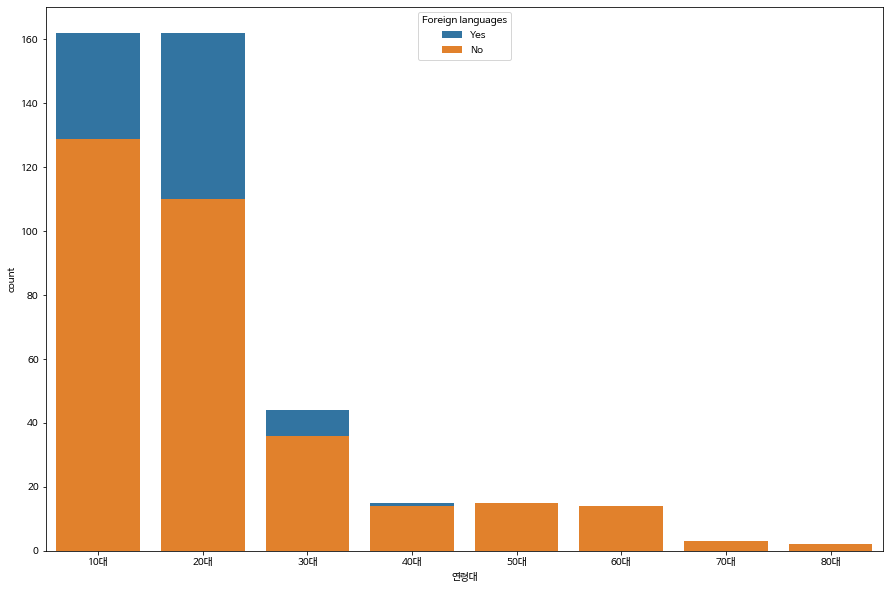

In [113]:
#연령대별 다른 나라 노래 선호도 시각화

plt.figure(figsize=(15,10))
df1 = df.sort_values(by='연령대')
sns.countplot(data=df, x='연령대', hue='Foreign languages', dodge=False, order = df['연령대'].value_counts().index)


- 10대, 20대는 다른 국가의 노래를 어느정도 듣는 다는 것을 파악할 수 있음

- 연령대가 높은 집단은 다른 국가의 노래를 듣지않음